学习资料：《[Mastering Predictive Analytics with Python](https://www.worldcat.org/title/mastering-predictive-analytics-with-python/oclc/958121934)》

- 样例代码：http://www.packtpub.com
- 彩图：http://www.packtpub.com/sites/default/files/downloads/MasteringPredictiveAnalyticswithPython_ColorImages.pdf

# 数据转换为决策——从分析应用着手
## 基本元素
- 试图预测的结果或目标，如**点击率**
- 一组包含了**特征值**的数据列——也被称为**预测因子**，用以数据集中每条记录的单个属性
- 能发现单个或整套模型的程序，并把这些特征恰到好处地映射到给定样本数据所关注的结果上
- 一种在新数据上评估模型性能的方法

## 主要任务
- 将原始数据转换为模型需要的净化格式。这包括清洗异常数据以及将非结构化数据转化为结构化数据。
- 特征工程，将这些净化后的输入数据转换为设计预测模型所需要的格式。
- 通过数据子集校准预测模型并评估其性能。
- 评估模型的持续性能时对新数据评分。
- 对于定期更新，自动实现转换和建模工作。
- 将模型的输出信息展现给其他系统和用户——通常通过 Web 应用实现。
- 为分析员和企业用户生成报告，从数据和模型中提取有规律的、强大的洞见。

## 预测分析的目标
- 推理包括搭建模型以评估不同参数对不同结果的意义，强调结果的意义和透明度而不是预测性能。

## 设计高级分析方案

### 基本组件

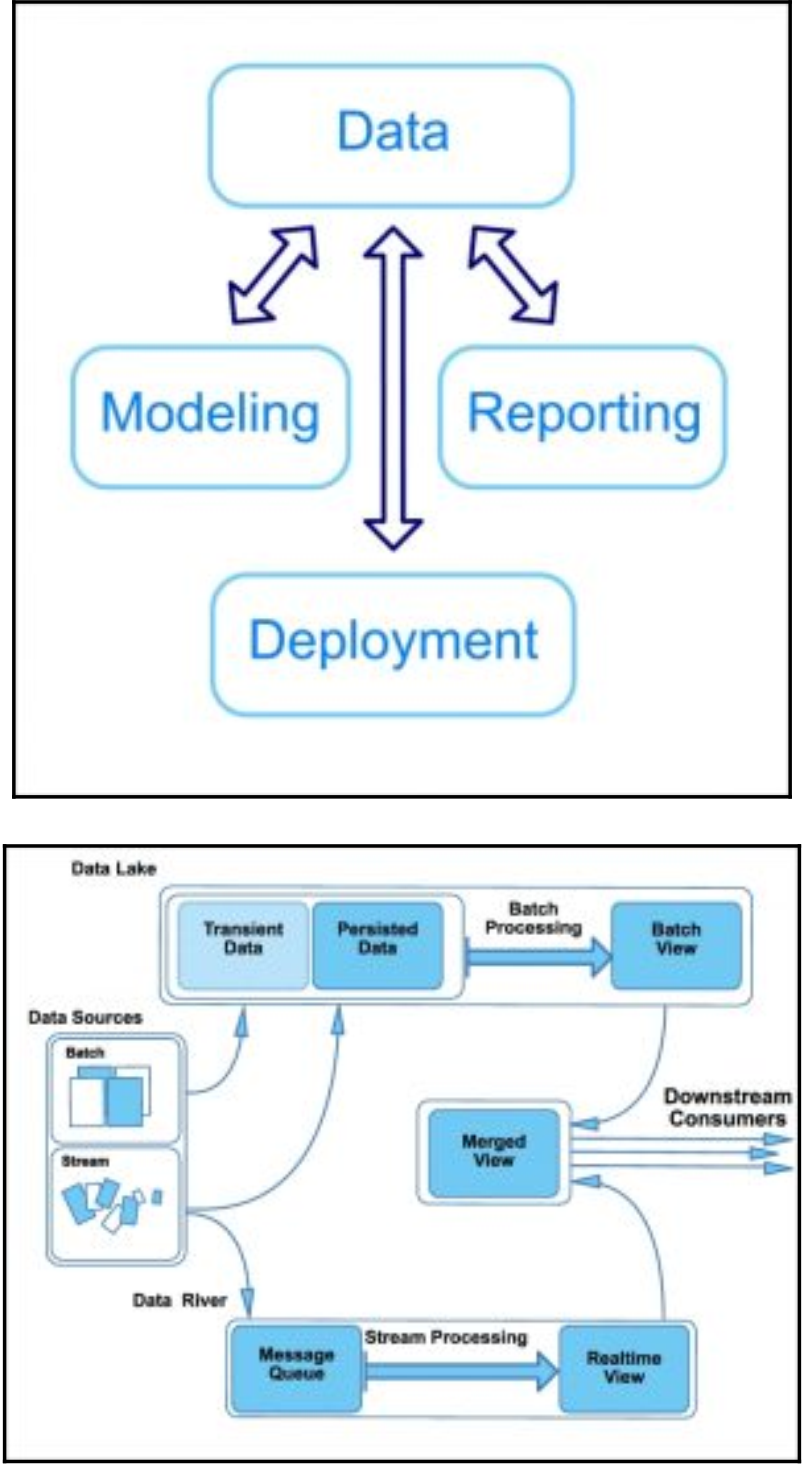

#### **数据层**

这一阶段 主要解决的问题包括数据的存储、处理和持久性，以及如何为分析应用服务的下游应用提供服务。数据就像粘合剂一样将应用中的其他组件联合在一起,所有这些但是基于数据层进行存储和更新状态信息的。

由于其他三个组件都是与数据层交互的，所以它们是可以独立设计的。

#### 模型层

此时，数据已经被转换为 Python 模型代码能够接收的形式。进一步的特征工程可能会将这些干净的数据转换为模型输入数据，并将数据划分成子集以及执行优化调整的层层迭代。模型也要确保可持续性以及下游用户的可部署性。本阶段也包含评估接收到的新数据或者执行定期的模型健康审计。

#### 部署层

模型层的算法开发和性能组件通常都是通过 Web 服务展示给个人用户或者其他软件系统的。这些使用者们通过网络调用服务层与其交互，来实现新一轮开发以及获取预测分析查询结果。

#### 报告层

通过使用报告服务，预测模型参数以及洞见均可实现可视化和自动化。

### 数据层：数据仓库、数据湖和数据流

#### 数据层的组件
Lambda 架构：
- **数据源**：既可以是流数据中接收的实时数据，也可以是从定期或者间断性基础组件中接收到的批量更新数据。
- **数据湖**：实时和批量数据均保存在数据湖模型中，分布式文件系统例如 **Hadoop 文件系统（HDFS）**或是**Amazon 网页服务（AWS）简单存储服务（S3）**都是通用存储介质，用来存放批量数据和流数据。这种数据可以存放一定时间（临时）或永久（持久）保存。这种数据将会以基于 MapReduce 或 Spark 框架的持续批量转换的形式被处理，例如**抽取、装载和转换（ETL）**。ETL 处理可能会包含清洗数据、按关注指标聚合，或者将其原始输入形式转换为表单格式。这种处理形成了 Lambda 架构的批处理层，这一层没有实时性要求，数据的表面视图延迟几分钟到几天都在下游应用的容许范围之内。
- **数据河**：数据湖的中心位置聚集了所有种类的原始数据，而数据河生成持续的消息队列将实时数据分配给流处理任务。这也被定义为构架的**速度层**，一旦有数据立即处理，支持实时性要求。
- **合并视图**：原始数据的实时视图和批量视图都可以合并到通常的持久层，例如支持结构化数据表的数据仓库可以通过**结构化查询语言（SQL）**查询，既能用于事务型应用（例如实时更新银行余额），也可以用于分析型应用（例如，运行分析或给出报告）。这种合并系统也被称为**服务层**,也可以通过数据库系统直接查询，或是开放给下游应用使用。
- **下游应用**：下游应用类似于高级分析管道系统，既支持直接使用批量处理和实时处理层的输出，也可以通过数据仓库系统中的合并视图与一个或所有资源交互。

### 模型层
模型层包含一系列相互关联的任务：
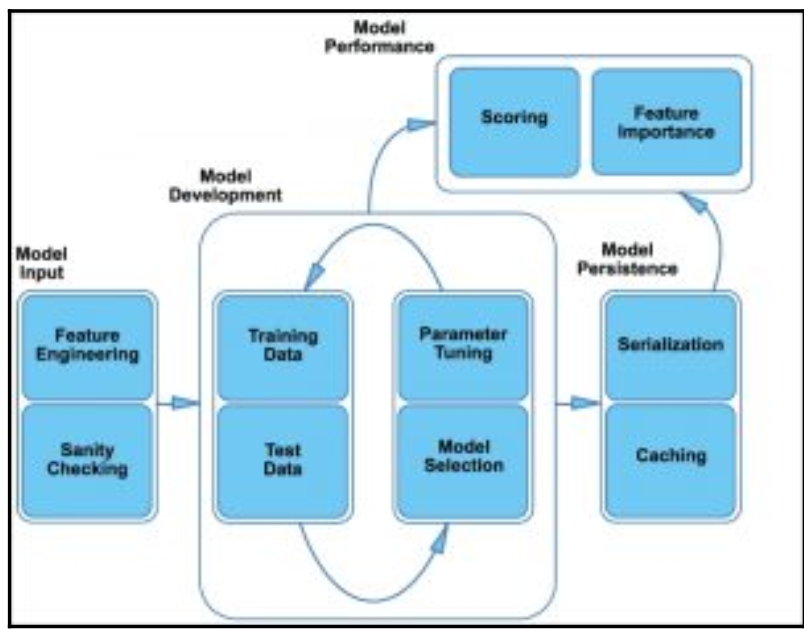

- 流管道作用于持续数据源（例如及时消息或新闻提要），一旦数据生成，可以支持实时模型更新或评分。
- **批量处理**：处理那些定期更新的数据源，即数据处理和模型开发不是实时的。

#### 组件

- **模型输入**：源数据被装载并可能被管道转换为预测模型所需要的输入格式。包括特征工程和完整性检查（是否有异常数据）。
- **模型开发**：
    - **数据拆分**：我们将数据拆分为分散集、训练数据（可以借此调整算法参数）以及测试数据（用于评估目的）。
    - **参数调整**：超参数（在针对训练数据集进行模型参数优化前需要设置的参数，样例包括聚类应用的组数量，随机森林算法中的树数量，或者神经网络中的学习频率和层数）需要经常校准用以优化预测模型性能——可以通过网格搜索等方法。这个校准工作只能在模型开发的初始化阶段进行，或者作为定期训练的部分内容。
    - **参数选择**：去除输入数据中没有内涵的特征数据。
    我们会尝试多种算法来完成以上工作并从中选择最佳执行技术。
    
- **模型性能**：运用从模型开发分离出的测试数据或者整组新观察值，模型层也要负责记录新数据、建立模型重要特征值以及提供模型持续性能的相关信息。一旦模型已经基于一组输入数据训练过，它就可以应用到实时计算的新数据上或离线使用，批处理生成预测结果或行为。根据初始化数据处理程度，新纪录也需要通过转换生成模型评估所需要的特征。这类转换工作的程度指明了流处理或批处理框架是否很好地完成记录。同样，使用结果预测有助于指导选择流处理还是批处理。当分值作为其他系统的输入值时，响应系统（例如搜索结果展现或网页广告展现），考虑到新分值的即刻使用，实时更新流管道更有价值。当分值主要用于内部决策（例如优先销售额指引的后续操作）不需要实时更新。**延时**的区别在于下游用户是另一个应用（机器间的交互），还是依据模型获取内部信息的人类用户（机器与人类）。

- **模型持久化**：一旦完成了预测模型参数的调整，我们也需要打包结果或者将其序列化为符合产品部署要求的格式。简言之，这个过程包含将模型输出转换为适合下游系统使用的格式并保存到数据层，这样既可以用作灾难恢复，也可以用于下游报告层。

### 部署层

通过部署层，预测建模的输出可以广泛应用到个人用户和其他软件服务。部署层在 Web 应用中封装了前面层的建模、计算和评估功能。

#### 组件
- **应用层**：接收来自网页的网络请求——通过网页浏览或者其他软件系统生成的程序性请求传输。这些应用通常提供一组标准化的命令来发起操作、获取结果、保存新信息或者删除不想要的信息。它们也会与数据层交互存储结果，又或者在碰到运行时间较长的任务式存储建模运算过程中的信息。包含预测服务和建模服务。
- **服务层**：这些应用接收的网络请求均由服务层代理，服务层提供应用间的路由通信服务（通常基于 URL 模式）。
- **客户层**：客户层向服务器发出请求，可以是交互式系统，例如仪表盘、或者例如电子邮件服务这种独立系统，该层运用模型输出调度输出消息。

### 报告层

分析管道的输出结果由报告层展现，该层包括：

- **可视化**：可视化支持数据源与模型数据，例如参数和特征重要度的交互查询；也能实现模型输出可视化，例如提供给电子商务网站用户的一组推荐信或是某一银行账户的风险评估。因为可视化通常是交互模式，我们也考虑将大型模型输入数据聚集成适用于探索性会话低延迟的总结性数据集。可视化还可以是一个特别的流程（例如交互式记事本），或者一组特定的图形（如仪表盘）。
- **审计/健康检查**：报告服务包括不间断的应用监控。
- **比较报告**：在模型迭代开发实验过程中，我们会用到比较报告。